In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import zipfile
import os

with zipfile.ZipFile('/content/drive/MyDrive/data.zip', 'r') as zip_ref:
    zip_ref.extractall('')
# with zipfile.ZipFile('/content/drive/MyDrive/sardin.zip', 'r') as zip_ref:
#     zip_ref.extractall('')
# with zipfile.ZipFile('/content/drive/MyDrive/chandana.zip', 'r') as zip_ref:
#     zip_ref.extractall('')

**Importing the Dependencies**

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
Ilish_pic= os.listdir('ilish')
print(Ilish_pic[0:5])
print(Ilish_pic[-5:])

print()

['6373.webp', '5810.webp', '1162.webp', '3737.webp', '5992.webp']
['3880.webp', '8808.webp', '131.webp', '8749.webp', '4243.webp']



In [5]:
Sardin_pic= os.listdir('sardin')

In [6]:
Chandana_pic= os.listdir('chandana')

In [7]:
print('Ilish images:', len(Ilish_pic))
print('Sardin images:', len(Sardin_pic))
print('Chandana images:', len(Chandana_pic))

Ilish images: 10000
Sardin images: 10000
Chandana images: 10000


**Creating Labels for the two class of Images**

Ilish  -->   0

Sardin  -->  1

Chandana --> 2

In [8]:
# create the labels

Ilish_labels = [0]*10000

Sardin_labels = [1]*10000

Chandana_labels = [2]*10000

In [9]:
print(Ilish_labels[0:5])

print(Sardin_labels[0:5])

print(Chandana_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]


In [10]:
print(len(Ilish_labels))
print(len(Sardin_labels))
print(len(Chandana_labels))

10000
10000
10000


In [11]:
labels = Ilish_labels + Sardin_labels + Chandana_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

30000
[0, 0, 0, 0, 0]
[2, 2, 2, 2, 2]


**Displaying the Images**

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [12]:
import numpy as np
import random
from PIL import Image

# Parameters
image_number = 10000  # Number of images to select from each type

# Initialize the list to store the images
data = []

# Process ilish images
ilish_path = 'ilish/'
Ilish_pic = sorted(os.listdir(ilish_path))  # Make sure the images are in order
random.shuffle(Ilish_pic)  # Shuffle images to get random ones
for img_file in Ilish_pic[:image_number]:
    image = Image.open(ilish_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process sardin images
sardin_path = 'sardin/'
Sardin_pic = sorted(os.listdir(sardin_path))  # Make sure the images are in order
random.shuffle(Sardin_pic)  # Shuffle images to get random ones
for img_file in Sardin_pic[:image_number]:
    image = Image.open(sardin_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Process chandana images
chandana_path = 'chandana/'
Chandana_pic = sorted(os.listdir(chandana_path))  # Make sure the images are in order
random.shuffle(Chandana_pic)  # Shuffle images to get random ones
for img_file in Chandana_pic[:image_number]:
    image = Image.open(chandana_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Now, `data` contains 4000 random images from each type, for a total of 12,000 images.

In [13]:
# Convert labels to numpy array for easy processing
labels = np.array(labels)

# Count the number of images in each class
unique, counts = np.unique(labels, return_counts=True)

# Print the number of images for each class
class_counts = dict(zip(unique, counts))
print(f"Class counts: {class_counts}")

Class counts: {0: 10000, 1: 10000, 2: 10000}


array([[[120, 124, 125],
        [160, 164, 165],
        [118, 120, 120],
        ...,
        [138, 137, 137],
        [116, 109, 103],
        [119, 114, 108]],

       [[123, 127, 129],
        [139, 143, 144],
        [163, 166, 166],
        ...,
        [149, 149, 149],
        [ 87,  85,  79],
        [136, 133, 126]],

       [[165, 169, 172],
        [152, 155, 157],
        [169, 170, 172],
        ...,
        [153, 152, 153],
        [ 47,  46,  44],
        [131, 130, 128]],

       ...,

       [[113, 113, 112],
        [105, 105, 103],
        [124, 124, 124],
        ...,
        [157, 159, 158],
        [163, 165, 164],
        [177, 181, 180]],

       [[120, 122, 121],
        [118, 118, 118],
        [124, 124, 127],
        ...,
        [106, 106, 104],
        [127, 129, 126],
        [157, 160, 159]],

       [[114, 114, 112],
        [132, 132, 130],
        [133, 134, 136],
        ...,
        [115, 115, 113],
        [ 96,  95,  92],
        [ 91,  90,  86]]], dtype=uint8)
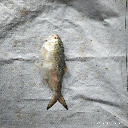

In [14]:
data[50]

In [15]:
type(data)

list

In [16]:
len(data)

30000

array([[[182, 185, 187],
        [173, 178, 182],
        [176, 181, 185],
        ...,
        [136, 143, 146],
        [142, 147, 149],
        [122, 132, 132]],

       [[174, 179, 182],
        [177, 183, 183],
        [177, 183, 185],
        ...,
        [149, 154, 157],
        [128, 137, 138],
        [121, 129, 130]],

       [[175, 181, 181],
        [179, 184, 187],
        [171, 176, 179],
        ...,
        [138, 146, 148],
        [129, 137, 137],
        [122, 132, 134]],

       ...,

       [[ 68,  72,  79],
        [125, 131, 137],
        [132, 137, 140],
        ...,
        [ 92, 102, 101],
        [ 98, 106, 103],
        [ 99, 103, 107]],

       [[  5,   7,  13],
        [133, 141, 143],
        [141, 147, 147],
        ...,
        [ 93, 101, 104],
        [ 98, 106, 106],
        [100, 107, 107]],

       [[ 19,  22,  29],
        [139, 144, 147],
        [114, 119, 123],
        ...,
        [ 96, 101, 102],
        [ 95, 105, 103],
        [103, 106, 106]]], dtype=uint8)
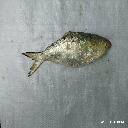

In [17]:
data[0]

In [18]:
type(data[0])

numpy.ndarray

In [19]:
data[0].shape

(128, 128, 3)

In [20]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [21]:
type(X)

numpy.ndarray

In [22]:
type(Y)

numpy.ndarray

In [23]:
print(X.shape)
print(Y.shape)

(30000, 128, 128, 3)
(30000,)


In [24]:
print(Y)

[0 0 0 ... 2 2 2]


**Train Test Split**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(30000, 128, 128, 3) (24000, 128, 128, 3) (6000, 128, 128, 3)


In [27]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[169, 172, 183],
        [178, 182, 193],
        [189, 193, 204],
        ...,
        [187, 192, 208],
        [181, 187, 202],
        [176, 182, 197]],

       [[172, 176, 187],
        [182, 185, 197],
        [191, 195, 207],
        ...,
        [187, 192, 209],
        [181, 187, 203],
        [176, 181, 196]],

       [[177, 180, 191],
        [186, 189, 201],
        [194, 198, 210],
        ...,
        [187, 193, 209],
        [182, 188, 203],
        [176, 182, 197]],

       ...,

       [[183, 183, 193],
        [182, 182, 192],
        [181, 181, 191],
        ...,
        [151, 149, 152],
        [151, 149, 152],
        [151, 149, 152]],

       [[182, 182, 192],
        [181, 182, 192],
        [180, 180, 190],
        ...,
        [150, 148, 151],
        [151, 148, 152],
        [151, 149, 152]],

       [[182, 182, 192],
        [181, 181, 191],
        [178, 178, 188],
        ...,
        [149, 147, 151],
        [150, 148, 152],
        [151, 149, 152]]], dtype=uint8)
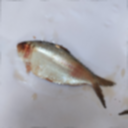

In [28]:
X_train[0]

In [29]:
X_train_scaled[0]

array([[[0.6627451 , 0.6745098 , 0.71764706],
        [0.69803922, 0.71372549, 0.75686275],
        [0.74117647, 0.75686275, 0.8       ],
        ...,
        [0.73333333, 0.75294118, 0.81568627],
        [0.70980392, 0.73333333, 0.79215686],
        [0.69019608, 0.71372549, 0.77254902]],

       [[0.6745098 , 0.69019608, 0.73333333],
        [0.71372549, 0.7254902 , 0.77254902],
        [0.74901961, 0.76470588, 0.81176471],
        ...,
        [0.73333333, 0.75294118, 0.81960784],
        [0.70980392, 0.73333333, 0.79607843],
        [0.69019608, 0.70980392, 0.76862745]],

       [[0.69411765, 0.70588235, 0.74901961],
        [0.72941176, 0.74117647, 0.78823529],
        [0.76078431, 0.77647059, 0.82352941],
        ...,
        [0.73333333, 0.75686275, 0.81960784],
        [0.71372549, 0.7372549 , 0.79607843],
        [0.69019608, 0.71372549, 0.77254902]],

       ...,

       [[0.71764706, 0.71764706, 0.75686275],
        [0.71372549, 0.71372549, 0.75294118],
        [0.70980392, 0

#Base CNN

In [30]:
import tensorflow as tf
from tensorflow import keras

###Optuna Hyper-parameter Tuing
###Start

In [31]:
# import keras
# from keras import layers, models
# import optuna
# from sklearn.model_selection import train_test_split

# # Define the model creation function
# def create_model(learning_rate, num_filters, kernel_size, input_shape, num_of_classes):
#     model = models.Sequential()

#     model.add(layers.Conv2D(num_filters, kernel_size, activation='relu', input_shape=input_shape))
#     model.add(layers.MaxPooling2D())

#     model.add(layers.Conv2D(num_filters * 2, kernel_size, activation='relu'))
#     model.add(layers.MaxPooling2D())

#     model.add(layers.Flatten())

#     model.add(layers.Dense(64, activation='relu'))
#     model.add(layers.Dropout(0.5))

#     model.add(layers.Dense(32, activation='relu'))
#     model.add(layers.Dropout(0.5))

#     model.add(layers.Dense(num_of_classes, activation='softmax'))

#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])

#     return model









# # Objective function for Optuna
# def objective(trial):
#     # Define hyperparameters to tune
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
#     num_filters = trial.suggest_int('num_filters', 16, 128)
#     kernel_size = trial.suggest_categorical('kernel_size', [(3, 3), (5, 5), (7, 7)])

#     # Create the model
#     model = create_model(
#         learning_rate=learning_rate,
#         num_filters=num_filters,
#         kernel_size=kernel_size,
#         input_shape=(256, 256, 3),  # Change if your input shape differs
#         num_of_classes=3            # Number of classes
#     )

#     # Split training data into training and validation subsets
#     X_train_fold, X_val_fold, Y_train_fold, Y_val_fold = train_test_split(
#         X_train_scaled, Y_train, test_size=0.2, random_state=42)

#     # Train the model
#     model.fit(X_train_fold, Y_train_fold,
#               epochs=5,  # Use fewer epochs for faster Optuna optimization
#               batch_size=32,
#               validation_data=(X_val_fold, Y_val_fold),
#               verbose=0)

#     # Evaluate the model on the validation set
#     loss, accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
#     return accuracy  # Return validation accuracy as the objective metric







# # Run the Optuna study
# study = optuna.create_study(direction='maximize')  # Maximize validation accuracy
# study.optimize(objective, n_trials=20)  # Number of trials

# # Print the best trial
# print("\nBest Trial:")
# print(f"  Value: {study.best_value}")
# print(f"  Params: {study.best_params}")







# # Train the final model using the best hyperparameters
# best_params = study.best_params
# final_model = create_model(
#     learning_rate=best_params['learning_rate'],
#     num_filters=best_params['num_filters'],
#     kernel_size=best_params['kernel_size'],
#     input_shape=(256, 256, 3),
#     num_of_classes=3
# )

# # Train on the full training data
# final_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1)

# # Evaluate on the test set
# loss, accuracy = final_model.evaluate(X_test_scaled, Y_test)
# print(f"\nTest Accuracy: {accuracy:.4f}")


###End

In [32]:
import keras
from keras import layers

num_of_classes = 3

model = keras.Sequential()

model.add(keras.layers.Conv2D(57, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D())  #pool_size=(2,2)


model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D())


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# compile the neural network
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0000002568689),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [34]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [35]:
# !pip install --upgrade tensorflow

In [36]:
# import tensorflow as tf
# print(tf.__version__)


In [37]:
# import tensorflow as tf

# # Assuming `X_train_scaled` and `Y_train` are NumPy arrays
# train_dataset_size = int(0.9 * len(X_train_scaled))  # 90% for training
# val_dataset_size = len(X_train_scaled) - train_dataset_size  # 10% for validation

# # Convert to tf.data.Dataset
# dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, Y_train))

# # Shuffle and split into training and validation datasets
# train_dataset = dataset.take(train_dataset_size).shuffle(buffer_size=1000).batch(32).prefetch(tf.data.AUTOTUNE)
# val_dataset = dataset.skip(train_dataset_size).batch(32).prefetch(tf.data.AUTOTUNE)

In [38]:
# # Train the model
# history = model.fit(
#     train_dataset,
#     validation_data=val_dataset,
#     epochs=20
# )

In [48]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.3484 - loss: 1.1011 - val_acc: 0.4692 - val_loss: 1.0862
Epoch 2/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.3852 - loss: 1.0897 - val_acc: 0.4854 - val_loss: 1.0739
Epoch 3/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.4236 - loss: 1.0782 - val_acc: 0.5663 - val_loss: 1.0594
Epoch 4/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.4493 - loss: 1.0683 - val_acc: 0.5871 - val_loss: 1.0453
Epoch 5/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.4690 - loss: 1.0578 - val_acc: 0.6371 - val_loss: 1.0342
Epoch 6/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.4720 - loss: 1.0510 - val_acc: 0.6338 - val_loss: 1.0234
Epoch 7/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.4926 - loss: 1.0405 - val_acc: 0.6300 - val_loss: 1.0129
Epoch 8/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.5001 - loss: 1.0351 - val_acc: 0.6587 - val_loss: 1.0018
Epoch 9/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - a

In [49]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.6768 - loss: 0.9227
Train Accuracy = 0.6819583177566528


In [50]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

print('Test Accuracy =', accuracy)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.6923 - loss: 0.9126
Test Accuracy = 0.6901666522026062


In [51]:
y_pred=model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[0 1 1 ... 0 0 1]


In [52]:
from sklearn.metrics import accuracy_score

# Example for classification predictions
accuracy = accuracy_score(Y_test, y_pred_classes)  # y_pred_classes should be class labels
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.6901666666666667


In [53]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print (f"R² Score: {r2}")

R² Score: 0.07907092967487361


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix:
[[1256  550  191]
 [ 233 1604  193]
 [ 408  284 1281]]


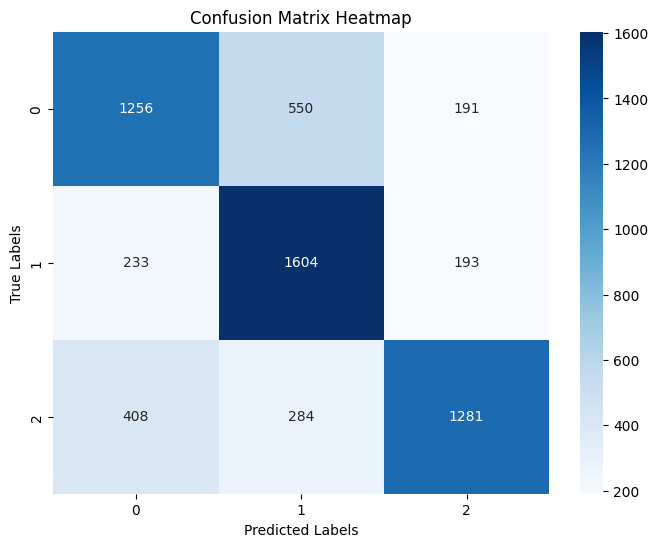

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions and convert to class labels
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)

# Print the confusion matrix (optional)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()



Classification Metrics:
Precision: 0.6960
Recall: 0.6902
F1 Score: 0.6892

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.63      0.65      1997
           1       0.66      0.79      0.72      2030
           2       0.77      0.65      0.70      1973

    accuracy                           0.69      6000
   macro avg       0.70      0.69      0.69      6000
weighted avg       0.70      0.69      0.69      6000



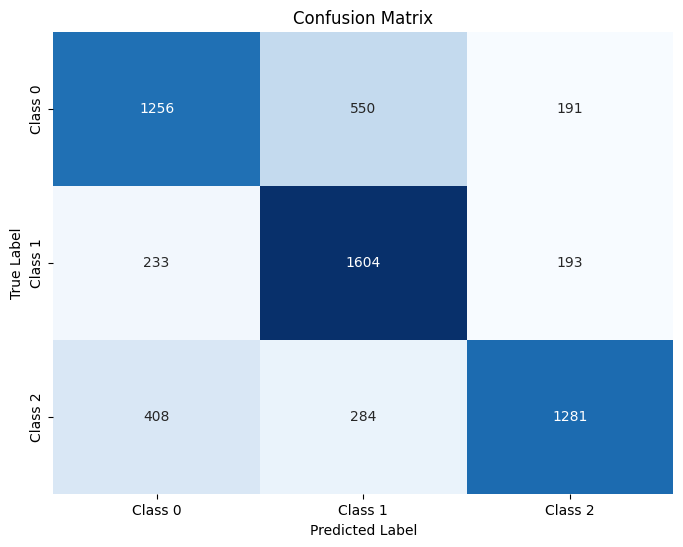

<ipython-input-55-5d372593e538>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')


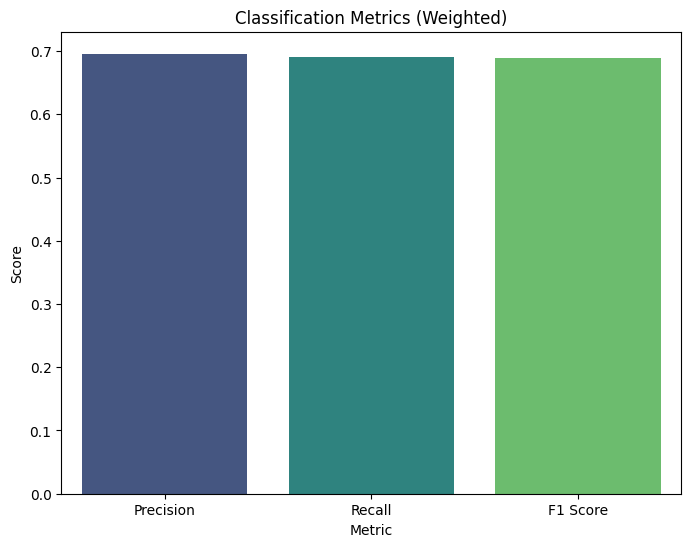

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Assuming y_pred_classes is the predicted labels and Y_test is the true labels
# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_classes)

# Plot Confusion Matrix using Seaborn Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'], cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Precision, Recall, and F1 Score for each class
# Let's assume your model has 3 classes
metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# You can create a barplot to visualize precision, recall, and F1 score for each class
metrics_data = {
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Score': [precision, recall, f1]
}

# Create the seaborn barplot
metrics_df = pd.DataFrame(metrics_data)
plt.figure(figsize=(8, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.title('Classification Metrics (Weighted)')
plt.show()


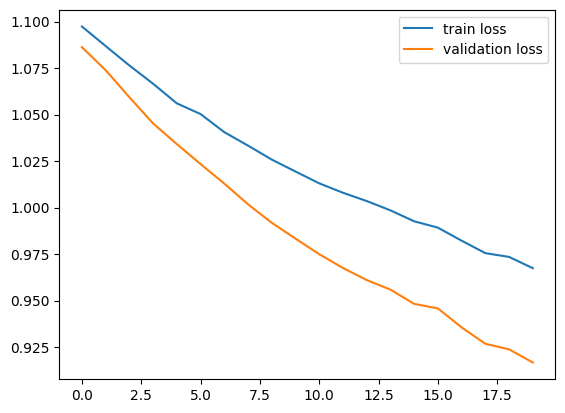

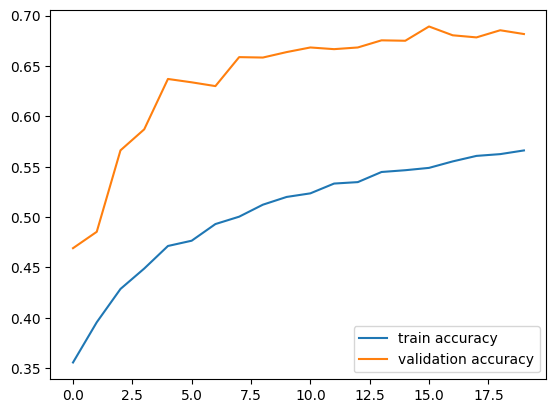

In [56]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

#With K-Fold [Cross Validation]

In [57]:
import keras
from keras import layers, models
from sklearn.model_selection import train_test_split

# Define the model creation function
def create_model(learning_rate, num_filters, kernel_size, input_shape, num_of_classes):
    model = models.Sequential()

    model.add(layers.Conv2D(num_filters, kernel_size, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D())

    model.add(layers.Conv2D(num_filters * 2, kernel_size, activation='relu'))
    model.add(layers.MaxPooling2D())

    model.add(layers.Flatten())

    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_of_classes, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model



Training Fold 1...
Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.4048 - loss: 1.0841 - val_accuracy: 0.5906 - val_loss: 0.8633
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5249 - loss: 0.8969 - val_accuracy: 0.6283 - val_loss: 0.7892
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5666 - loss: 0.8361 - val_accuracy: 0.7138 - val_loss: 0.7129
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6552 - loss: 0.7539 - val_accuracy: 0.8402 - val_loss: 0.5520
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7102 - loss: 0.6713 - val_accuracy: 0.8746 - val_loss: 0.4869
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7701 - loss: 0.5953 - val_accuracy: 0.8919 - val_loss: 0.4101
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7929 - loss: 0.5417 - val_accuracy: 0.8946 - val_loss: 0.3741
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8068 - lo

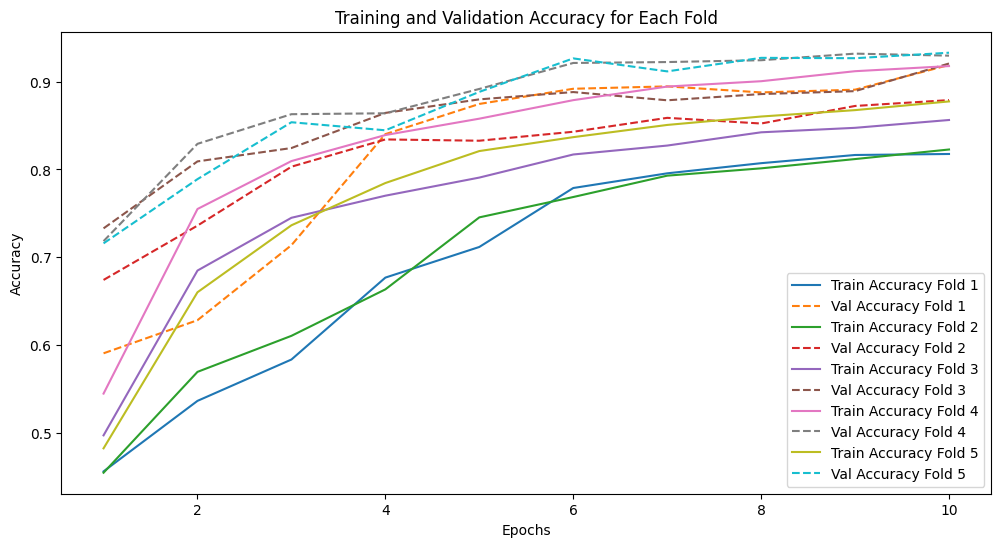

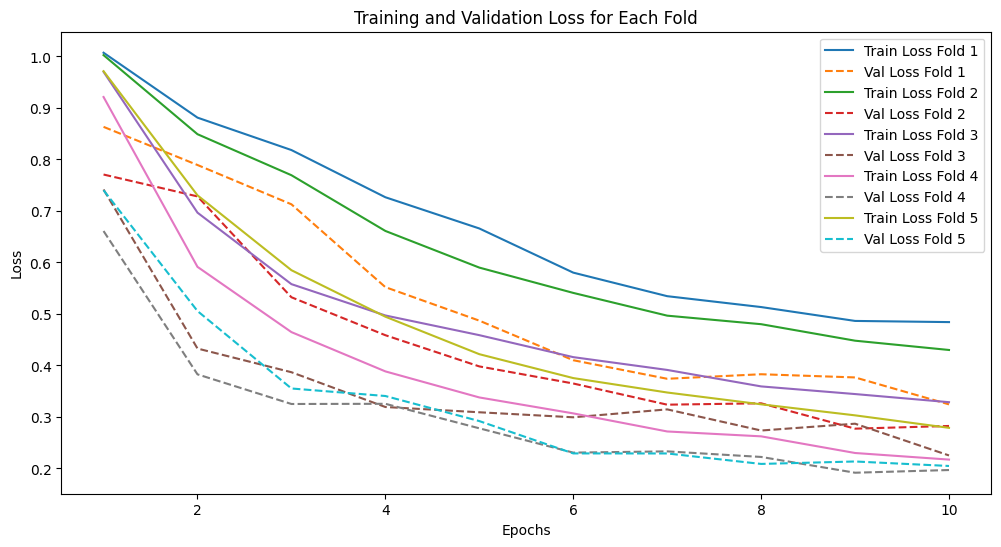

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_21" is incompatible with the layer: expected axis -1 of input shape to have value 668856, but received input with shape (32, 156600)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 128, 128, 3), dtype=float32)
  • training=True
  • mask=None

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold

# K-Fold Cross-Validation setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
scores = []
history_list = []  # To store history objects for each fold

# Initialize lists to store fold-wise results
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

for train_index, val_index in kfold.split(X_train_scaled, Y_train):
    print(f"\nTraining Fold {fold_no}...")

    # Split data into training and validation for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Create the model
    model = create_model(
        learning_rate=0.00025686890659545365,
        num_filters=87,
        kernel_size=(3, 3),
        input_shape=(128, 128, 3),
        num_of_classes=3
    )

    # Train the model
    history = model.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=10,
        batch_size=32,
        verbose=1
    )

    # Store the training and validation metrics for each fold
    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Loss: {loss}, Accuracy: {accuracy}")

    scores.append(accuracy)
    fold_no += 1

# Print average accuracy across folds
print(f"\nAverage Validation Accuracy: {np.mean(scores)}")

In [ ]:
# Plotting the training and validation accuracy for each fold
plt.figure(figsize=(12, 6))
for i in range(len(train_accuracies)):
    plt.plot(range(1, 11), train_accuracies[i], label=f'Train Accuracy Fold {i+1}')
    plt.plot(range(1, 11), val_accuracies[i], label=f'Val Accuracy Fold {i+1}', linestyle='--')

plt.title('Training and Validation Accuracy for Each Fold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss for each fold
plt.figure(figsize=(12, 6))
for i in range(len(train_losses)):
    plt.plot(range(1, 11), train_losses[i], label=f'Train Loss Fold {i+1}')
    plt.plot(range(1, 11), val_losses[i], label=f'Val Loss Fold {i+1}', linestyle='--')

plt.title('Training and Validation Loss for Each Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
# Final evaluation on the test set
final_model = create_model(
    learning_rate=0.00025686890659545365,
    num_filters=87,
    kernel_size=(3, 3),
    input_shape=(128, 128, 3),
    num_of_classes=3
)

# Train the final model on the full training set
final_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4266 - loss: 1.0801
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6448 - loss: 0.7495
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7454 - loss: 0.5649
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7925 - loss: 0.4771
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8381 - loss: 0.3970
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8501 - loss: 0.3689
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8570 - loss: 0.3405
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8601 - loss: 0.3290
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8826 - loss: 0.2823
Epoch 10/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8907 - loss: 0.2755


**Model Evaluation**

In [62]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9732 - loss: 0.0904
Train Accuracy = 0.9730416536331177


In [63]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)

print('Test Accuracy =', accuracy)

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9360 - loss: 0.1891
Test Accuracy = 0.937666654586792


In [64]:
y_pred=model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[0 1 2 ... 0 0 1]


In [65]:
from sklearn.metrics import accuracy_score

# Example for classification predictions
accuracy = accuracy_score(Y_test, y_pred_classes)  # y_pred_classes should be class labels
print(f"Accuracy Score: {accuracy}")


Accuracy Score: 0.9376666666666666


In [66]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print (f"R² Score: {r2}")

R² Score: 0.8226657370052273


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix:
[[1871   76   50]
 [  51 1896   83]
 [  60   54 1859]]


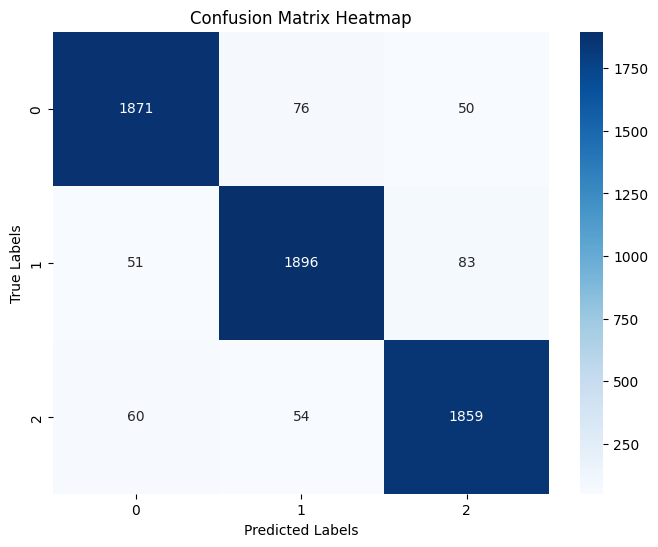

In [67]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions and convert to class labels
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)

# Print the confusion matrix (optional)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion Matrix:
[[1871   76   50]
 [  51 1896   83]
 [  60   54 1859]]


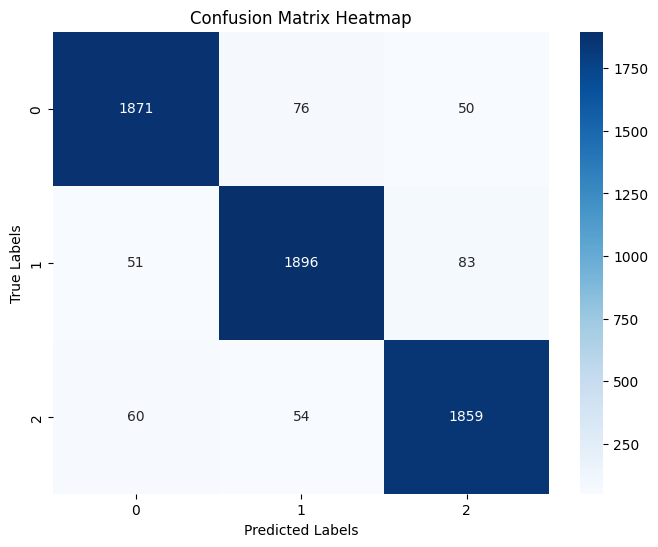

In [68]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions and convert to class labels
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_test), yticklabels=np.unique(Y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [69]:

# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))


Classification Metrics:
Precision: 0.9377
Recall: 0.9377
F1 Score: 0.9377

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1997
           1       0.94      0.93      0.93      2030
           2       0.93      0.94      0.94      1973

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



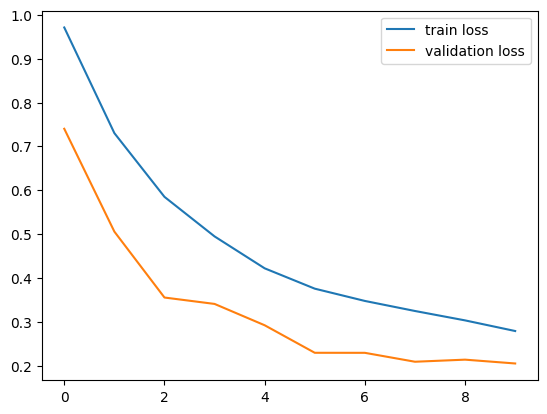

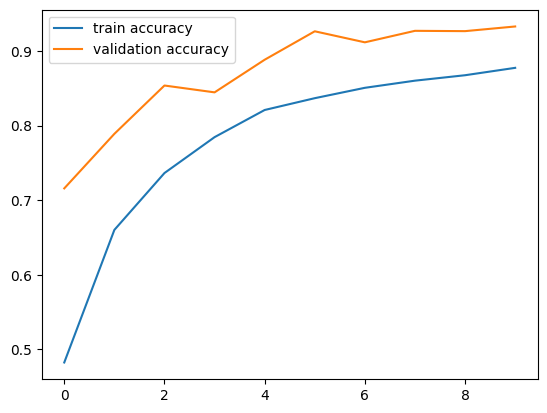

In [70]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [71]:
# After training the model
model.save('cnn_with_k-fold_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [72]:
#import pickle

#with open('fish_model.pkl', 'wb') as file:
 #   pickle.dump(model, file)

In [73]:

# model.save('CNN_model.keras')


In [74]:
# # from keras.models import load_model

# model = load_model('fish_model.h5')
# print("Model loaded successfully!")


In [75]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Specify the directory path
# base_path = 'ilish/'

# # Get the image file name from user input
# image_file_name = input('Enter the name of the image file (with extension): ')

# # Combine the base path with the user input to get the full path
# input_image_path = base_path + image_file_name

# # Debug: Print the full image path
# print(f"Trying to load image from: {input_image_path}")

# # Load the image
# input_image = cv2.imread(input_image_path)

# # Check if the image was loaded successfully
# if input_image is None:
#     print(f"Error: Unable to load image at {input_image_path}. Please check the file name and path.")
# else:
#     # Convert image from BGR to RGB for displaying with matplotlib
#     input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

#     # Display the image using matplotlib
#     plt.imshow(input_image_rgb)
#     plt.axis('off')  # Hide axis
#     plt.show()

#     # Resize the image and preprocess for prediction
#     input_image_resized = cv2.resize(input_image, (256, 256))
#     input_image_scaled = input_image_resized / 255.0
#     input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

#     # Make a prediction
#     input_prediction = model.predict(input_image_reshaped)
#     print(input_prediction)

#     # Get the predicted class label
#     input_pred_label = np.argmax(input_prediction)
#     print(input_pred_label)

#     # Display the result based on the predicted label
#     if input_pred_label == 0:
#         print('The Fish is Ilish')
#     elif input_pred_label == 1:
#         print('The Fish is Sardin')
#     else:
#         print('The Fish is Chandina')

###RMS Prop Optimizer

In [88]:
from sklearn.model_selection import KFold
import keras
from keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Define the model creation function
def create_model(learning_rate, num_filters, kernel_size, input_shape, num_of_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(num_filters, kernel_size, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(num_filters * 2, kernel_size, activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_of_classes, activation='softmax'))

    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Normalize data (if not already normalized)
# X_train_scaled = X_train / 255.0
# X_test_scaled = X_test / 255.0

# Parameters
learning_rate = 0.00025686890659545365
num_filters = 87
kernel_size = (3, 3)
input_shape = (128, 128, 3)
num_of_classes = 3

# K-Fold Cross-Validation setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
scores = []

for train_index, val_index in kfold.split(X_train_scaled, Y_train):
    print(f"\nTraining Fold {fold_no}...")

    # Split data into training and validation for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Create the model
    model = create_model(
        learning_rate=learning_rate,
        num_filters=num_filters,
        kernel_size=kernel_size,
        input_shape=input_shape,
        num_of_classes=num_of_classes
    )

    # Train the model
    history = model.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=10,
        batch_size=32,
        verbose=1
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Loss: {loss}, Accuracy: {accuracy}")

    scores.append(accuracy)
    fold_no += 1

# Print average accuracy across folds
print(f"\nAverage Validation Accuracy: {np.mean(scores):.4f}")



Training Fold 1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.4078 - loss: 1.1242 - val_accuracy: 0.6600 - val_loss: 0.7935
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6370 - loss: 0.7972 - val_accuracy: 0.7871 - val_loss: 0.5198
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7426 - loss: 0.6077 - val_accuracy: 0.8296 - val_loss: 0.3993
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7886 - loss: 0.5027 - val_accuracy: 0.8140 - val_loss: 0.4281
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8119 - loss: 0.4542 - val_accuracy: 0.8573 - val_loss: 0.3504
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8166 - loss: 0.4358 - val_accuracy: 0.8775 - val_loss: 0.3122
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8363 - loss: 0.3971 - val_accuracy: 0.9031 - val_loss: 0.2863
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8484 - loss: 0.3919 - val_acc

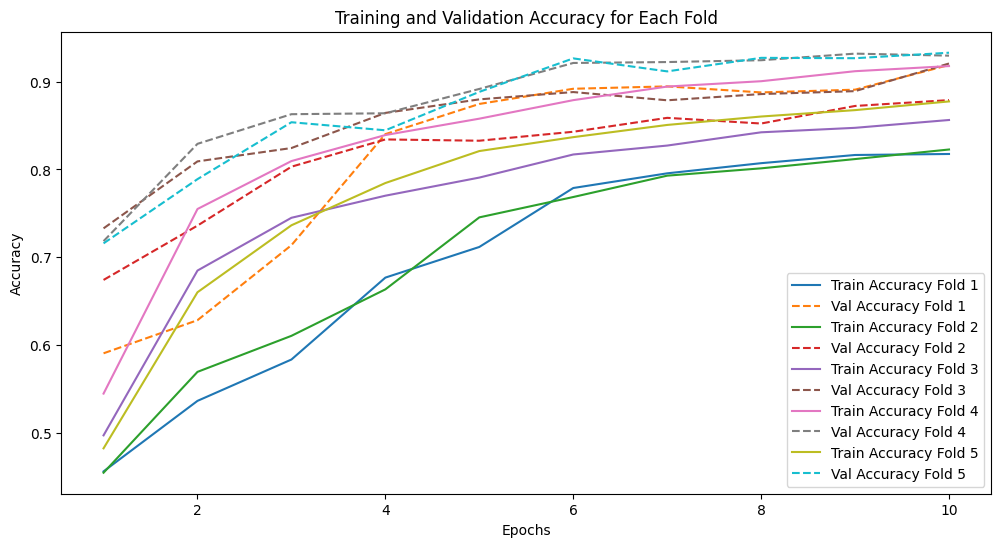

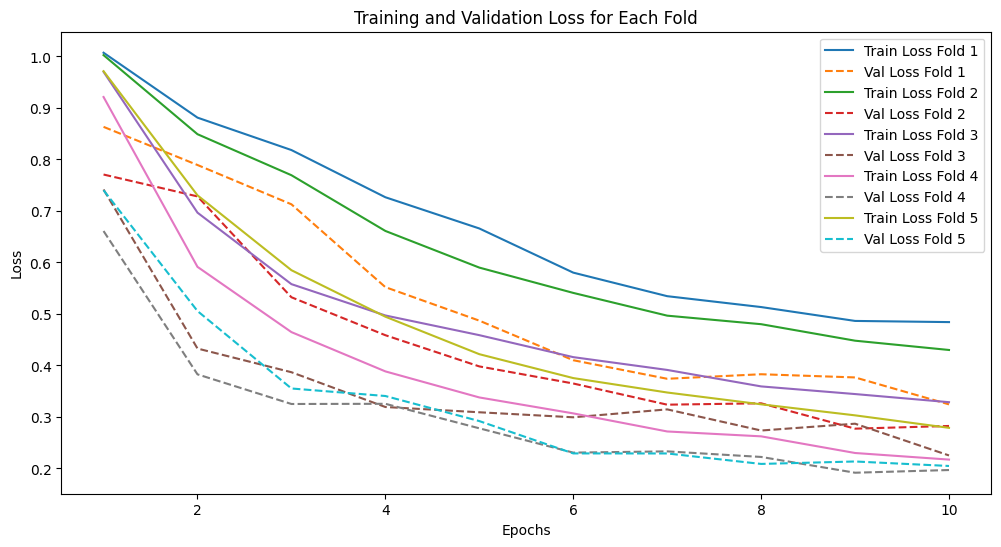

In [89]:
# Plotting the training and validation accuracy for each fold
plt.figure(figsize=(12, 6))
for i in range(len(train_accuracies)):
    plt.plot(range(1, 11), train_accuracies[i], label=f'Train Accuracy Fold {i+1}')
    plt.plot(range(1, 11), val_accuracies[i], label=f'Val Accuracy Fold {i+1}', linestyle='--')

plt.title('Training and Validation Accuracy for Each Fold')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the training and validation loss for each fold
plt.figure(figsize=(12, 6))
for i in range(len(train_losses)):
    plt.plot(range(1, 11), train_losses[i], label=f'Train Loss Fold {i+1}')
    plt.plot(range(1, 11), val_losses[i], label=f'Val Loss Fold {i+1}', linestyle='--')

plt.title('Training and Validation Loss for Each Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [90]:
# Final evaluation on the test set
final_model = create_model(
    learning_rate=learning_rate,
    num_filters=num_filters,
    kernel_size=kernel_size,
    input_shape=input_shape,
    num_of_classes=num_of_classes
)

In [91]:
# Train the final model on the full training set
history = final_model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.4629 - loss: 1.0394
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7192 - loss: 0.6557
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7978 - loss: 0.4989
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8405 - loss: 0.4148
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8684 - loss: 0.3517
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8789 - loss: 0.3337
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8901 - loss: 0.3031
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9007 - loss: 0.2844
Epoch 9/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9013 - loss: 0.2644
Epoch 10/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9038 - loss: 0.2697


In [106]:
# loss, accuracy = final_model.evaluate(X_test_scaled, Y_test)
history = final_model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=10)

print('Test Accuracy =', accuracy)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9040 - loss: 0.2617 - val_accuracy: 0.9490 - val_loss: 0.1506
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9153 - loss: 0.2373 - val_accuracy: 0.9446 - val_loss: 0.1500
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9112 - loss: 0.2510 - val_accuracy: 0.9546 - val_loss: 0.1315
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9102 - loss: 0.2467 - val_accuracy: 0.9500 - val_loss: 0.1418
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9139 - loss: 0.2539 - val_accuracy: 0.9429 - val_loss: 0.1440
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9123 - loss: 0.2546 - val_accuracy: 0.9502 - val_loss: 0.1420
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9086 - loss: 0.2548 - val_accuracy: 0.9513 - val_loss: 0.1434
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9076 - loss: 0.2517 - val_accu

In [107]:
# Evaluate the model on the training and test sets
train_loss, train_accuracy = final_model.evaluate(X_train_scaled, Y_train, verbose=0)
val_loss, val_accuracy = final_model.evaluate(X_test_scaled, Y_test, verbose=0)

print(f'\nTrain Accuracy = {train_accuracy:.4f}')
print(f'Test Accuracy = {test_accuracy:.4f}')


Train Accuracy = 0.9579
Test Accuracy = 0.9118


In [108]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


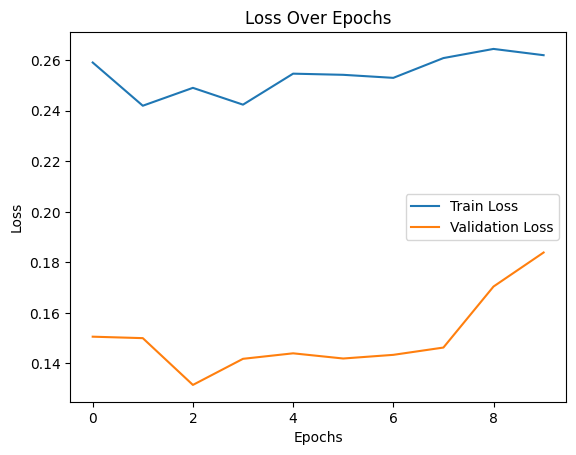

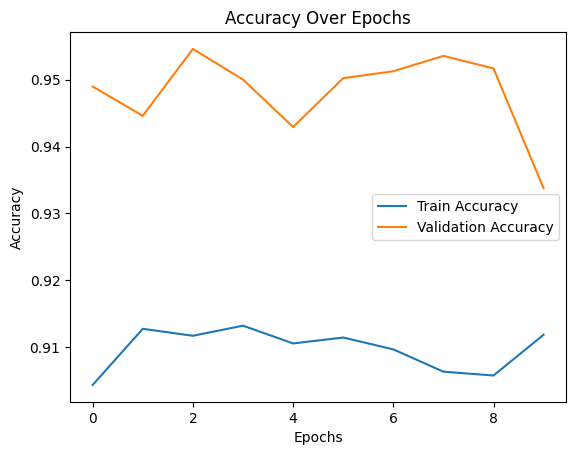

In [109]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


#RESNET50

In [110]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [111]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_22[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [112]:
num_of_classes = 3

model = models.Sequential()


# model.add(layers.UpSampling2D((2,2)))
# model.add(layers.UpSampling2D((2,2)))
# model.add(layers.UpSampling2D((2,2)))


model.add(convolutional_base)


model.add(layers.Flatten())
model.add(layers.BatchNormalization())


model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())


model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())


model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())


model.add(layers.Dense(num_of_classes, activation='softmax'))

#####RMS Optimizer

In [114]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [115]:
# Now fit the model with resized images
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 68s 32ms/step - acc: 0.3972 - loss: 1.3804 - val_acc: 0.2704 - val_loss: 1.2746
Epoch 2/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - acc: 0.5445 - loss: 1.0169 - val_acc: 0.7837 - val_loss: 0.5379
Epoch 3/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - acc: 0.6541 - loss: 0.8006 - val_acc: 0.8846 - val_loss: 0.4046
Epoch 4/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - acc: 0.7402 - loss: 0.6238 - val_acc: 0.9292 - val_loss: 0.2875
Epoch 5/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - acc: 0.8101 - loss: 0.4863 - val_acc: 0.9533 - val_loss: 0.1895
Epoch 6/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - acc: 0.8602 - loss: 0.3839 - val_acc: 0.9650 - val_loss: 0.1477
Epoch 7/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - acc: 0.8988 - loss: 0.2991 - val_acc: 0.9804 - val_loss: 0.1013
Epoch 8/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - acc: 0.9156 - loss: 0.2623 - val_acc: 0.9808 - val_loss: 0.0875
Epoch 9/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 

In [116]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.9996 - loss: 0.0031
Train Accuracy = 0.9988750219345093


In [117]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - acc: 0.9896 - loss: 0.0398
Test Accuracy = 0.9901666641235352


In [118]:
y_pred=model.predict(X_test_scaled)

y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
[0 1 2 ... 0 0 1]


In [119]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2}")

R² Score: 0.9707801498474522


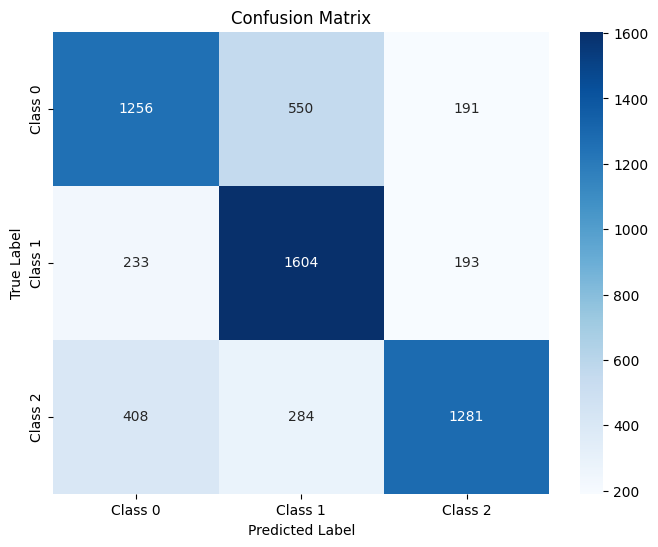

In [120]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [121]:

# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))


Classification Metrics:
Precision: 0.9902
Recall: 0.9902
F1 Score: 0.9902

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1997
           1       0.99      0.99      0.99      2030
           2       0.99      0.99      0.99      1973

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



In [ ]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('resnet_model.h5')

#####Adam Optimizer

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, r2_score
import keras
from keras import layers, models
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the model creation function
def create_model(learning_rate, input_shape, num_of_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_of_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Parameters
learning_rate = 2e-5
input_shape = (128, 128, 3)
num_of_classes = 3
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
fold_no = 1
scores = []
histories = []

for train_index, val_index in kfold.split(X_train_scaled, Y_train):
    print(f"\nTraining Fold {fold_no}...")

    # Split data for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Create the model
    model = create_model(learning_rate, input_shape, num_of_classes)

    # Train the model
    history = model.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=20,
        batch_size=32,
        verbose=1
    )
    histories.append(history)

    # Evaluate the model on validation set
    loss, accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Validation Loss: {loss}, Validation Accuracy: {accuracy}")
    scores.append(accuracy)
    fold_no += 1

# Average accuracy across folds
print(f"\nAverage Validation Accuracy: {np.mean(scores):.4f}")

# Train final model on full training data
final_model = create_model(learning_rate, input_shape, num_of_classes)
final_history = final_model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20, batch_size=32, verbose=1)

# Evaluate on the test set
test_loss, test_accuracy = final_model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred = final_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nPredicted Classes:")
print(y_pred_classes)

# R² Score
r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2:.4f}")

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Precision, Recall, F1 Score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

# Plot training and validation loss/accuracy for the final model
h = final_history.history

plt.plot(h['loss'], label='Train Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(h['accuracy'], label='Train Accuracy')
plt.plot(h['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


#SGD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, r2_score
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the model creation function
def create_model(input_shape, num_classes, learning_rate, momentum):
    model = models.Sequential()

    # Add convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten and fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Parameters
input_shape = (128, 128, 3)  # Adjust to your image dimensions
num_classes = 3
learning_rate = 0.01
momentum = 0.9
batch_size = 32
epochs = 20

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
scores = []

for train_index, val_index in kfold.split(X_train_scaled, Y_train):
    print(f"\nTraining Fold {fold_no}...")

    # Split data for the fold
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[val_index]

    # Create the model
    model = create_model(input_shape, num_classes, learning_rate, momentum)

    # Callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

    # Train the model
    history = model.fit(
        X_train_fold, Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[reduce_lr, early_stopping],
        verbose=1
    )

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val_fold, Y_val_fold, verbose=0)
    print(f"Fold {fold_no} - Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
    scores.append(val_accuracy)
    fold_no += 1

# Average validation accuracy across folds
print(f"\nAverage Validation Accuracy: {np.mean(scores):.4f}")

# Final training on the full dataset
final_model = create_model(input_shape, num_classes, learning_rate, momentum)
final_history = final_model.fit(
    X_train_scaled, Y_train,
    validation_split=0.1,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# Evaluate on the test set
test_loss, test_accuracy = final_model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred = final_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# R² Score
r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2:.4f}")

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Precision, Recall, F1 Score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

# Plot training and validation loss/accuracy for the final model
h = final_history.history

plt.plot(h['loss'], label='Train Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(h['accuracy'], label='Train Accuracy')
plt.plot(h['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


#Cross-Validation Check
1. **Validation Set Approach**
2. **Leave-P-Out Cross-Validation**
3. **Leave-One-Out Cross-Validation**
4. **K-Fold Cross-Validation**
5. **Stratified K-Fold Cross-Validation**


###With K-Fold

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import ResNet50
import numpy as np

# Parameters
num_of_classes = 3
k_folds = 5
epochs = 20
batch_size = 32

# ResNet50 base model
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Initialize KFold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Store fold results
fold_no = 1
accuracies = []

for train_index, val_index in kf.split(X_train_scaled):
    print(f"\nFold {fold_no} ------------------------")

    # Split training data into train/validation for this fold
    X_fold_train, X_fold_val = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_fold_train, Y_fold_val = Y_train[train_index], Y_train[val_index]

    # Define the model
    model = models.Sequential()
    model.add(convolutional_base)
    model.add(layers.Flatten())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(num_of_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

    # Train the model
    history = model.fit(
        X_fold_train, Y_fold_train,
        validation_data=(X_fold_val, Y_fold_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(X_fold_val, Y_fold_val)
    print(f"Fold {fold_no} - Validation Accuracy: {accuracy}")
    accuracies.append(accuracy)

    # Increment fold number
    fold_no += 1

# Final results
print("\nK-Fold Cross Validation Results:")
print(f"Accuracies: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Standard Deviation: {np.std(accuracies):.4f}")

# Final evaluation on the test set
final_loss, final_accuracy = model.evaluate(X_test_scaled, Y_test)
print(f"\nFinal Test Accuracy: {final_accuracy}")

#With Stratified K-fold

In [ ]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications import ResNet50
import numpy as np

# Parameters
num_of_classes = 3
k_folds = 5
epochs = 20
batch_size = 32

# ResNet50 base model
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Store fold results
fold_no = 1
accuracies = []

for train_index, val_index in skf.split(X_train_scaled, Y_train):
    print(f"\nFold {fold_no} ------------------------")

    # Split training data into train/validation for this fold
    X_fold_train, X_fold_val = X_train_scaled[train_index], X_train_scaled[val_index]
    Y_fold_train, Y_fold_val = Y_train[train_index], Y_train[val_index]

    # Define the model
    model = models.Sequential()
    model.add(convolutional_base)
    model.add(layers.Flatten())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(num_of_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

    # Train the model
    history = model.fit(
        X_fold_train, Y_fold_train,
        validation_data=(X_fold_val, Y_fold_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(X_fold_val, Y_fold_val)
    print(f"Fold {fold_no} - Validation Accuracy: {accuracy}")
    accuracies.append(accuracy)

    # Increment fold number
    fold_no += 1

# Final results
print("\nStratified K-Fold Cross Validation Results:")
print(f"Accuracies: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Standard Deviation: {np.std(accuracies):.4f}")

# Final evaluation on the test set
final_loss, final_accuracy = model.evaluate(X_test_scaled, Y_test)
print(f"\nFinal Test Accuracy: {final_accuracy}")


#MobileNet

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
from tensorflow.keras.applications import MobileNetV2
# Model
convolutional_base = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
convolutional_base.summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Number of classes
num_classes = 3

# Load the MobileNetV2 model with input shape (128, 128, 3)
# Set `include_top=False` to exclude the default fully connected layer at the top
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Freeze the base model layers to retain pre-trained weights
base_model.trainable = False

# Add custom layers on top of the base model
model = models.Sequential([
    convolutional_base,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(num_classes, activation='softmax')
])


In [ ]:

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:

# Print the model summary
model.summary()

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# Now fit the model with resized images
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=25)

In [ ]:
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

In [ ]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('mobileNet_model.h5')

#EfficientNetB0

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import optimizers

# Load EfficientNetB0 as the base model
convolutional_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
convolutional_base.summary()

In [ ]:
num_of_classes = 3

# Initialize a sequential model
model = models.Sequential()

# Add the EfficientNet base model (without the top layer)
model.add(convolutional_base)

# Flatten the output of EfficientNet
model.add(layers.Flatten())
model.add(layers.BatchNormalization())

# Dense layers with dropout and batch normalization
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

# Output layer with softmax activation
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
# Compile the model with an optimizer
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:

# Now fit the model with resized images
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

In [ ]:
# Evaluate the model on training and test sets
loss, accuracy = model.evaluate(X_train_scaled, Y_train)
print('Train Accuracy =', accuracy)


loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred_classes)
print(f"R² Score: {r2}")

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

In [ ]:
h = history


plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('efficientNet_model.h5')

#Ensemble Learning/Hybrid Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback

# # Load your dataset and preprocess
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# # Scale the data to [0, 1] range
# X_train_scaled = X_train / 255.0
# X_test_scaled = X_test / 255.0


In [ ]:

# Convert to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)
Y_train_tensor = tf.convert_to_tensor(Y_train, dtype=tf.int64)
Y_test_tensor = tf.convert_to_tensor(Y_test, dtype=tf.int64)


In [ ]:

# Build CNN Model
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(3, activation='softmax')
    ])
    return model


# Build ResNet Model (Pretrained)
def build_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(3, activation='softmax')
    ])
    return model


# Build EfficientNet Model (Pretrained)
def build_efficientnet_model():
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(3, activation='softmax')
    ])
    return model


In [ ]:

# Create the Ensemble Model
class EnsembleModel(tf.keras.Model):
    def __init__(self, models):
        super(EnsembleModel, self).__init__()
        self.models = models

    def call(self, inputs):
        outputs = [model(inputs) for model in self.models]
        return tf.reduce_mean(outputs, axis=0)  # Averaging the outputs

# Instantiate individual models
cnn_model = build_cnn_model()
resnet_model = build_resnet_model()
efficientnet_model = build_efficientnet_model()

# Create the ensemble model
ensemble_model = EnsembleModel([cnn_model, resnet_model, efficientnet_model])

# Compile the ensemble model
ensemble_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Visualization Callback
class FeatureMapVisualizer(Callback):
    def __init__(self, model, X_train, num_images=1, layer_name="conv2d"):
        self.model = model
        self.X_train = X_train
        self.num_images = num_images
        self.layer_name = layer_name

    def on_epoch_end(self, epoch, logs=None):
        # Take the first image for visualization
        first_image = self.X_train[0:1]

        # Get the layer output
        layer_output = self.model.get_layer(self.layer_name).output
        feature_map_model = tf.keras.models.Model(inputs=self.model.input, outputs=layer_output)

        # Get feature maps
        feature_maps = feature_map_model.predict(first_image)

        # Plot the feature maps
        self.plot_feature_maps(feature_maps)

    def plot_feature_maps(self, feature_maps):
        num_feature_maps = feature_maps.shape[-1]
        num_columns = 8
        num_rows = num_feature_maps // num_columns + (num_feature_maps % num_columns != 0)
        plt.figure(figsize=(15, 15))

        for i in range(num_feature_maps):
            plt.subplot(num_rows, num_columns, i + 1)
            plt.imshow(feature_maps[0, :, :, i], cmap='gray')
            plt.axis('off')

        plt.show()

# Visualizer callback to see feature maps after each convolutional layer
visualizer = FeatureMapVisualizer(ensemble_model, X_train_tensor, layer_name="conv2d")


In [ ]:

# Train the ensemble model with the visualization callback
ensemble_model.fit(X_train_tensor, Y_train_tensor, epochs=10, batch_size=32,
                   validation_data=(X_test_tensor, Y_test_tensor), callbacks=[visualizer])


In [ ]:

# Evaluate the model
test_loss, test_acc = ensemble_model.evaluate(X_test_tensor, Y_test_tensor)
print(f"Test accuracy: {test_acc}")


In [ ]:
ensemble_model.save('ensemble_model.h5')
print("Model loaded successfully!")

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import r2_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming your data is ready, e.g., X_test_tensor and Y_test_tensor

# Make predictions
y_pred = ensemble_model.predict(X_test_tensor)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert the predictions to class labels


In [ ]:

# 1. **R2 Score** (more useful for regression, but still can be used for classification tasks)
r2 = r2_score(Y_test_tensor, y_pred_classes)
print(f"R2 Score: {r2:.4f}")


In [ ]:

# # 2. **F1 Score**
# f1 = f1_score(Y_test_tensor, y_pred_classes, average='weighted')  # Use 'macro' or 'weighted' for multi-class
# print(f"F1 Score: {f1:.4f}")

# Compute precision, recall, and F1 score
precision = precision_score(Y_test, y_pred_classes, average='weighted')
recall = recall_score(Y_test, y_pred_classes, average='weighted')
f1 = f1_score(Y_test, y_pred_classes, average='weighted')

# Print metrics
print("\nClassification Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_classes))

In [ ]:

# 3. **Accuracy Score**
accuracy = accuracy_score(Y_test_tensor, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")


In [ ]:

# 4. **Confusion Matrix**
cm = confusion_matrix(Y_test_tensor, y_pred_classes)

# Plot Confusion Matrix with Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:

# # 5. **Correlation Matrix** (usually used for features, but here you can use confusion matrix for classification)
# # This is more applicable if you're dealing with continuous data features.
# corr_matrix = np.corrcoef(X_test_tensor.numpy().T)
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix of Features')
# plt.show()


In [ ]:

# # 6. **Precision-Recall Curve**
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import average_precision_score

# precision, recall, _ = precision_recall_curve(Y_test_tensor, y_pred_classes)
# average_precision = average_precision_score(Y_test_tensor, y_pred_classes)

# # Plot Precision-Recall Curve
# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, color='b', label=f'Average Precision: {average_precision:.2f}')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend()
# plt.show()


In [ ]:

# 7. **ROC Curve and AUC**
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test_tensor, y_pred_classes, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC: {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


#K-Fold

In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, EfficientNetB0
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback


In [ ]:

# Parameters for K-Fold
k_folds = 5  # Number of folds
batch_size = 32
epochs = 10
num_classes = 3  # Number of classes in the dataset

# Scale the data to [0, 1] range
X_scaled = X / 255.0

# Convert to TensorFlow tensors
X_tensor = tf.convert_to_tensor(X_scaled, dtype=tf.float32)
Y_tensor = tf.convert_to_tensor(Y, dtype=tf.int64)


In [ ]:

# Build CNN Model
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), name="conv2d_1"),
        layers.MaxPooling2D(name="maxpool_1"),
        layers.Conv2D(64, (3, 3), activation='relu', name="conv2d_2"),
        layers.MaxPooling2D(name="maxpool_2"),
        layers.Flatten(name="flatten"),
        layers.Dense(128, activation='relu', name="dense_1"),
        layers.Dense(num_classes, activation='softmax', name="output")
    ])
    return model

# Build ResNet Model (Pretrained)
def build_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(name="global_avg_pool"),
        layers.Dense(num_classes, activation='softmax', name="output")
    ])
    return model

# Build EfficientNet Model (Pretrained)
def build_efficientnet_model():
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(name="global_avg_pool"),
        layers.Dense(num_classes, activation='softmax', name="output")
    ])
    return model


In [ ]:

# Create the Ensemble Model
class EnsembleModel(tf.keras.Model):
    def __init__(self, models):
        super(EnsembleModel, self).__init__()
        self.models = models

    def call(self, inputs):
        outputs = [model(inputs) for model in self.models]
        return tf.reduce_mean(outputs, axis=0)  # Averaging the outputs

# Visualization Callback
class FeatureMapVisualizer(Callback):
    def __init__(self, model, X_train, num_images=1, layer_names=None):
        self.model = model
        self.X_train = X_train[:num_images]
        self.layer_names = layer_names or ["conv2d_1", "conv2d_2"]

    def on_epoch_end(self, epoch, logs=None):
        for layer_name in self.layer_names:
            self.visualize_layer(layer_name, epoch)

    def visualize_layer(self, layer_name, epoch):
        layer_output = self.model.get_layer(layer_name).output
        feature_map_model = tf.keras.models.Model(inputs=self.model.input, outputs=layer_output)

        # Get feature maps
        feature_maps = feature_map_model.predict(self.X_train)

        # Plot the feature maps
        num_feature_maps = feature_maps.shape[-1]
        num_columns = 8
        num_rows = num_feature_maps // num_columns + (num_feature_maps % num_columns != 0)
        plt.figure(figsize=(15, 15))

        for i in range(num_feature_maps):
            plt.subplot(num_rows, num_columns, i + 1)
            plt.imshow(feature_maps[0, :, :, i], cmap='gray')
            plt.axis('off')

        plt.suptitle(f"Feature Maps for Layer {layer_name} - Epoch {epoch + 1}")
        plt.show()


In [ ]:
# Instantiate individual models
cnn_model = build_cnn_model()
resnet_model = build_resnet_model()
efficientnet_model = build_efficientnet_model()

# Create the ensemble model
ensemble_model = EnsembleModel([cnn_model, resnet_model, efficientnet_model])


#Adam

In [ ]:

# Compile the ensemble model
ensemble_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])


In [ ]:

# K-Fold Cross-Validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

fold = 1
for train_index, val_index in kf.split(X_tensor):
    print(f"\nTraining on Fold {fold}/{k_folds}...")

    # Split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_tensor[train_index], X_tensor[val_index]
    Y_train_fold, Y_val_fold = Y_tensor[train_index], Y_tensor[val_index]

    # Visualizer callback to see feature maps for each convolutional layer
    visualizer = FeatureMapVisualizer(ensemble_model, X_train_fold.numpy(), layer_names=["conv2d_1", "conv2d_2"])


    # Train the ensemble model on this fold
    history = ensemble_model.fit(
        X_train_fold,
        Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[visualizer]
    )

    # Evaluate the model on the validation set
    val_loss, val_acc = ensemble_model.evaluate(X_val_fold, Y_val_fold)
    print(f"Fold {fold} - Validation Accuracy: {val_acc}")

    fold += 1

# Final Evaluation
print("\nFinal Evaluation on Test Set...")
test_loss, test_acc = ensemble_model.evaluate(X_test_tensor, Y_test_tensor)
print(f"Test Accuracy: {test_acc}")


# Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Call the plotting function with the last fold's history
plot_training_history(history)

In [ ]:
ensemble_model.save('ensemble_model_Kfold.h5')
print("Model loaded successfully!")

#RMSprop

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Compile the ensemble model with RMSprop and custom learning rate
ensemble_model.compile(optimizer=RMSprop(learning_rate=1e-4),  # You can adjust the learning rate as needed
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])


In [ ]:

# K-Fold Cross-Validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

fold = 1
for train_index, val_index in kf.split(X_tensor):
    print(f"\nTraining on Fold {fold}/{k_folds}...")

    # Split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_tensor[train_index], X_tensor[val_index]
    Y_train_fold, Y_val_fold = Y_tensor[train_index], Y_tensor[val_index]

    # Visualizer callback to see feature maps for each convolutional layer
    visualizer = FeatureMapVisualizer(ensemble_model, X_train_fold.numpy(), layer_names=["conv2d_1", "conv2d_2"])


    # Train the ensemble model on this fold
    history = ensemble_model.fit(
        X_train_fold,
        Y_train_fold,
        validation_data=(X_val_fold, Y_val_fold),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[visualizer]
    )

    # Evaluate the model on the validation set
    val_loss, val_acc = ensemble_model.evaluate(X_val_fold, Y_val_fold)
    print(f"Fold {fold} - Validation Accuracy: {val_acc}")

    fold += 1

# Final Evaluation
print("\nFinal Evaluation on Test Set...")
test_loss, test_acc = ensemble_model.evaluate(X_test_tensor, Y_test_tensor)
print(f"Test Accuracy: {test_acc}")


# Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

# Call the plotting function with the last fold's history
plot_training_history(history)

In [ ]:
ensemble_model.save('ensemble_model_Kfold.h5')
print("Model loaded successfully!")